In [1]:
import numpy as np

from time import time

import matplotlib.pyplot as plt
plt.rcParams.update({"font.size": 16})  # enlarge matplotlib fonts

In [2]:
import rustworkx as rx

from qiskit_nature.problems.second_quantization.lattice import Lattice

# Custom Heisenberg couplings
import sys
sys.path.append(r'.')  # may be needed if running notebook on a cloud service
from heisenberg_model import HeisenbergModel

In [3]:
from qiskit import QuantumCircuit, transpile
from qiskit.circuit import Parameter

from qiskit import IBMQ

In [4]:
# Doc for loading IBMQ account https://quantum-computing.ibm.com/lab/docs/iql/manage/account/ibmq#the-account
# IBMQ.save_account(TOKEN)
#IBMQ.load_account() # Load account from disk
#provider = IBMQ.get_provider(hub='ibm-q-community', group='ibmquantumawards', project='open-science-22')

# Real backend; needed for transpilation later on
#guadalupe = provider.get_backend("ibmq_guadalupe")

# Get fake backend if you like
from qiskit.providers.fake_provider import FakeGuadalupe

#Noisy simulator backend
noisy_sim = FakeGuadalupe()
from qiskit.opflow import Zero, One, I, X, Y, Z, PauliSumOp
from qiskit import Aer
from qiskit.providers.aer import QasmSimulator
#from qiskit.tools.monitor import job_monitor
#from qiskit.circuit import Parameter
backend = Aer.get_backend('qasm_simulator')

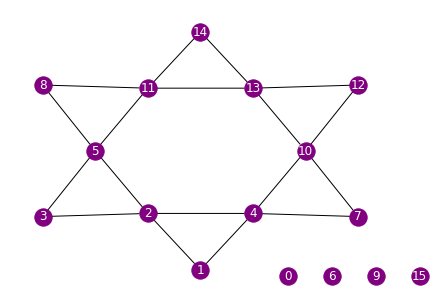

In [5]:
# Kagome unit cell
num_qubits = 16
# Edge weight
t = 1.0

# Generate graph of kagome unit cell
# Start by defining all the edges
graph_16 = rx.PyGraph(multigraph=False)
graph_16.add_nodes_from(range(num_qubits))
edge_list = [
    (1, 2, t),
    (2, 3, t),
    (3, 5, t),
    (5, 8, t),
    (8, 11, t),
    (11, 14, t),
    (14, 13, t),
    (13, 12, t),
    (12, 10, t),
    (10, 7, t),
    (7, 4, t),
    (4, 1, t),
    (4, 2, t),
    (2, 5, t),
    (5, 11, t),
    (11, 13, t),
    (13, 10, t),
    (10, 4, t),
]
# Generate graph from the list of edges
graph_16.add_edges_from(edge_list)

# Make a Lattice from graph
kagome_unit_cell_16 = Lattice(graph_16)

# Draw Lattice and include labels to check we exclude the right spins
# Specify node locations for better visualizations
kagome_pos = {0:[1,-1], 6:[1.5,-1], 9:[2,-1], 15:[2.5,-1], 
              1:[0,-0.8], 2:[-0.6,1], 4:[0.6,1], 10:[1.2,3], 
              13:[0.6,5], 11:[-0.6,5], 5:[-1.2,3], 3:[-1.8,0.9], 
              8:[-1.8,5.1], 14:[0,6.8], 7:[1.8,0.9], 12:[1.8,5.1]}
kagome_unit_cell_16.draw(style={'with_labels':True, 'font_color':'white', 'node_color':'purple', 'pos':kagome_pos})
plt.show()

In [6]:
from qiskit_nature.mappers.second_quantization import LogarithmicMapper
# Build Hamiltonian from graph edges
heis_16 = HeisenbergModel.uniform_parameters(
    lattice=kagome_unit_cell_16,
    uniform_interaction=t,
    uniform_onsite_potential=0.0,  # No singe site external field
)
heis_16
# Map from SpinOp to qubits just as before.
log_mapper = LogarithmicMapper()
ham_16 = 4 * log_mapper.map(heis_16.second_q_ops().simplify())
# Print Hamiltonian to check it's what we expect:
# 18 ZZ, 18 YY, and 18 XX terms over 16 qubits instead of over 12 qubits
ham_16

PauliSumOp(SparsePauliOp(['IZZIIIIIIIIIIIII', 'IIZZIIIIIIIIIIII', 'IZIIZIIIIIIIIIII', 'IIZIZIIIIIIIIIII', 'IIZIIZIIIIIIIIII', 'IIIZIZIIIIIIIIII', 'IIIIZIIZIIIIIIII', 'IIIIIZIIZIIIIIII', 'IIIIZIIIIIZIIIII', 'IIIIIIIZIIZIIIII', 'IIIIIZIIIIIZIIII', 'IIIIIIIIZIIZIIII', 'IIIIIIIIIIZIZIII', 'IIIIIIIIIIZIIZII', 'IIIIIIIIIIIZIZII', 'IIIIIIIIIIIIZZII', 'IIIIIIIIIIIZIIZI', 'IIIIIIIIIIIIIZZI', 'IYYIIIIIIIIIIIII', 'IIYYIIIIIIIIIIII', 'IYIIYIIIIIIIIIII', 'IIYIYIIIIIIIIIII', 'IIYIIYIIIIIIIIII', 'IIIYIYIIIIIIIIII', 'IIIIYIIYIIIIIIII', 'IIIIIYIIYIIIIIII', 'IIIIYIIIIIYIIIII', 'IIIIIIIYIIYIIIII', 'IIIIIYIIIIIYIIII', 'IIIIIIIIYIIYIIII', 'IIIIIIIIIIYIYIII', 'IIIIIIIIIIYIIYII', 'IIIIIIIIIIIYIYII', 'IIIIIIIIIIIIYYII', 'IIIIIIIIIIIYIIYI', 'IIIIIIIIIIIIIYYI', 'IXXIIIIIIIIIIIII', 'IIXXIIIIIIIIIIII', 'IXIIXIIIIIIIIIII', 'IIXIXIIIIIIIIIII', 'IIXIIXIIIIIIIIII', 'IIIXIXIIIIIIIIII', 'IIIIXIIXIIIIIIII', 'IIIIIXIIXIIIIIII', 'IIIIXIIIIIXIIIII', 'IIIIIIIXIIXIIIII', 'IIIIIXIIIIIXIIII', 'IIIIIIIIXIIXIIII', 'IIIIIIIIIIXIX

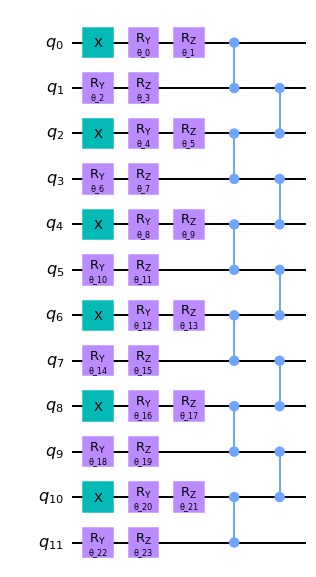

In [7]:
# Build a custom ansatz from scratch
ansatz_custom = QuantumCircuit(12)
# build initial state
ansatz_custom.x(range(0, 12, 2))
#ansatz_custom.cx(range(0, 11, 2), range(1, 12, 2))
j = 0
#for i in range(12):
#    theta=Parameter('θ_' + str(j))
#    ansatz_custom.ry(theta, i)
#    j += 1

#for i in range(12):
#        ansatz_custom.ry(Parameter('θ_' + str(j)), i)
#        j += 1
#        ansatz_custom.rz(Parameter('θ_' + str(j)), i)
#        j += 1

#ansatz_custom.cz(range(1, 4, 2), range(2, 5, 2))
#ansatz_custom.cz(range(0, 5, 2), range(1, 6, 2))
#ansatz_custom.cz(range(7, 10, 2), range(8, 11, 2))
#ansatz_custom.cz(range(6, 11, 2), range(7, 12, 2))
#for i in range(12):
#        ansatz_custom.ry(Parameter('θ_' + str(j)), i)
#        j += 1
#        ansatz_custom.rz(Parameter('θ_' + str(j)), i)
#        j += 1

#ansatz_custom.cz(range(1, 4, 2), range(2, 5, 2))
#ansatz_custom.cz(range(0, 5, 2), range(1, 6, 2))
#ansatz_custom.cz(range(7, 10, 2), range(8, 11, 2))
#ansatz_custom.cz(range(6, 11, 2), range(7, 12, 2))

for i in range(12):
        ansatz_custom.ry(Parameter('θ_' + str(j)), i)
        j += 1
        ansatz_custom.rz(Parameter('θ_' + str(j)), i)
        j += 1

ansatz_custom.cz(range(0, 11, 2), range(1, 12, 2))
ansatz_custom.cz(range(1, 11, 2), range(2, 12, 2))

#for i in range(12):
#    ansatz_custom.ry(Parameter('θ_' + str(j)), i)
#    j += 1
#    ansatz_custom.rz(Parameter('θ_' + str(j)), i)
#    j += 1

#ansatz_custom.cz(range(0, 11, 2), range(1, 12, 2))
#ansatz_custom.cz(range(1, 11, 2), range(2, 12, 2))

ansatz_custom.draw(fold=250, output="mpl")

number and type of gates in the cirucit: OrderedDict([('rz', 86), ('sx', 46), ('cx', 11), ('x', 6)])
number of parameters in the circuit: 24


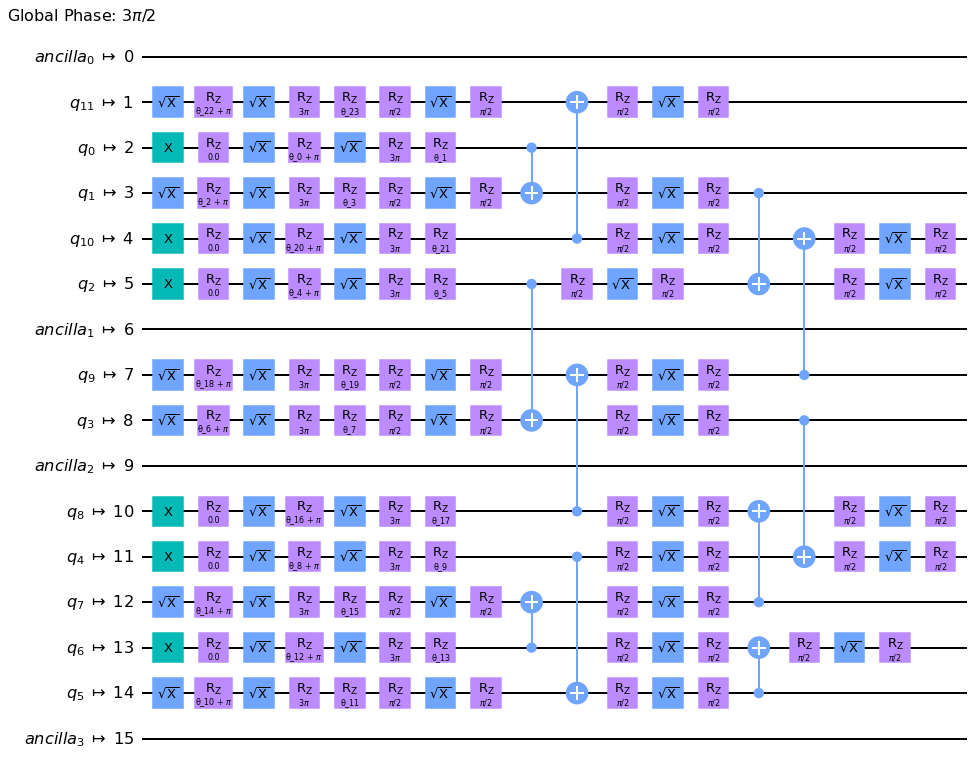

In [8]:
# Force anstaz to be applied to qubits in the heavy hex.
# Avoid the outer qubits 0, 6, 9, and 15 which we accounted for in the lattice definition.
q_layout = [2, 3, 5, 8, 11, 14, 13, 12, 10, 7, 4, 1]
ansatz_opt = transpile(ansatz_custom, backend=noisy_sim, initial_layout=q_layout)

print('number and type of gates in the cirucit:', ansatz_opt.count_ops())
print('number of parameters in the circuit:', ansatz_opt.num_parameters)
ansatz_opt.draw(fold=400, output="mpl")

In [9]:
from qiskit.algorithms.optimizers import SPSA, AQGD, GradientDescent

optimizer = GradientDescent(maxiter=20, learning_rate=0.1)
#optimizer = SPSA(maxiter=100, second_order=True)

In [10]:
from qiskit.algorithms import MinimumEigensolver, VQEResult

# Define a custome VQE class to orchestra the ansatz, classical optimizers, 
# initial point, callback, and final result
class CustomVQE(MinimumEigensolver):
    
    def __init__(self, estimator, circuit, optimizer, callback=None):
        self._estimator = estimator
        self._circuit = circuit
        self._optimizer = optimizer
        self._callback = callback
        
    def compute_minimum_eigenvalue(self, operators, aux_operators=None):
                
        # Define objective function to classically minimize over
        def objective(x):
            # Execute job with estimator primitive
            job = self._estimator.run([self._circuit], [operators], [x])
            # Get results from jobs
            est_result = job.result()
            # Get the measured energy value
            value = est_result.values[0]
            # Save result information using callback function
            if self._callback is not None:
                self._callback(value)
            return value
            
        # Select an initial point for the ansatzs' parameters
        x0 = np.pi/4 * np.random.rand(self._circuit.num_parameters)
        
        # Run optimization
        res = self._optimizer.minimize(objective, x0=x0)
        
        # Populate VQE result
        result = VQEResult()
        result.cost_function_evals = res.nfev
        result.eigenvalue = res.fun
        result.optimal_parameters = res.x
        return result


New: Making the effective Hamiltonian
We transform the given Hamiltonian to another representation by using grobal unitary transformation based on the optimized ansatz

New: Making the effective Hamiltonian
We transform the given Hamiltonian to another representation by using grobal unitary transformation based on the optimized ansatz

In [11]:
# Build effective Hamiltonian from graph edges
heis_16 = HeisenbergModel.uniform_parameters(
    lattice=kagome_unit_cell_16,
    uniform_interaction=t,
    uniform_onsite_potential=0.0,  # No singe site external field
)

# Map from SpinOp to qubits just as before.
log_mapper = LogarithmicMapper()
ham_16 = 4 * log_mapper.map(heis_16.second_q_ops().simplify())
# Print Hamiltonian to check it's what we expect:
# 18 ZZ, 18 YY, and 18 XX terms over 16 qubits instead of over 12 qubits
ham_16

PauliSumOp(SparsePauliOp(['IZZIIIIIIIIIIIII', 'IIZZIIIIIIIIIIII', 'IZIIZIIIIIIIIIII', 'IIZIZIIIIIIIIIII', 'IIZIIZIIIIIIIIII', 'IIIZIZIIIIIIIIII', 'IIIIZIIZIIIIIIII', 'IIIIIZIIZIIIIIII', 'IIIIZIIIIIZIIIII', 'IIIIIIIZIIZIIIII', 'IIIIIZIIIIIZIIII', 'IIIIIIIIZIIZIIII', 'IIIIIIIIIIZIZIII', 'IIIIIIIIIIZIIZII', 'IIIIIIIIIIIZIZII', 'IIIIIIIIIIIIZZII', 'IIIIIIIIIIIZIIZI', 'IIIIIIIIIIIIIZZI', 'IYYIIIIIIIIIIIII', 'IIYYIIIIIIIIIIII', 'IYIIYIIIIIIIIIII', 'IIYIYIIIIIIIIIII', 'IIYIIYIIIIIIIIII', 'IIIYIYIIIIIIIIII', 'IIIIYIIYIIIIIIII', 'IIIIIYIIYIIIIIII', 'IIIIYIIIIIYIIIII', 'IIIIIIIYIIYIIIII', 'IIIIIYIIIIIYIIII', 'IIIIIIIIYIIYIIII', 'IIIIIIIIIIYIYIII', 'IIIIIIIIIIYIIYII', 'IIIIIIIIIIIYIYII', 'IIIIIIIIIIIIYYII', 'IIIIIIIIIIIYIIYI', 'IIIIIIIIIIIIIYYI', 'IXXIIIIIIIIIIIII', 'IIXXIIIIIIIIIIII', 'IXIIXIIIIIIIIIII', 'IIXIXIIIIIIIIIII', 'IIXIIXIIIIIIIIII', 'IIIXIXIIIIIIIIII', 'IIIIXIIXIIIIIIII', 'IIIIIXIIXIIIIIII', 'IIIIXIIIIIXIIIII', 'IIIIIIIXIIXIIIII', 'IIIIIXIIIIIXIIII', 'IIIIIIIIXIIXIIII', 'IIIIIIIIIIXIX

### Callback
It's important to know what's going on between the classical and quantum computer during the optimization. What parameter values is the classical optimizer picking? How does the convergence to the ground state energy behave?

Defining a callback function gives us a chance to peek in. A simple callback method is defined below. See [this tutorial](https://qiskit.org/documentation/tutorials/algorithms/02_vqe_convergence.html) for more information and be sure to read the classical [optimizers' docs](https://qiskit.org/documentation/stubs/qiskit.algorithms.optimizers.html) for what specific values can be extracted during optimization. For example [SPSA](https://qiskit.org/documentation/stubs/qiskit.algorithms.optimizers.SPSA.html#qiskit.algorithms.optimizers.SPSA) returns: (nfev, parameters, value, stepsize, accepted).

In [12]:
# Define a simple callback function
intermediate_info = []
def callback(value):
    intermediate_info.append(value)
    print(value)

## 2-6 Execute simulated VQE
The VQE is built! Time to test it out on a simulator. This may take a few seconds.

In [13]:
from qiskit.primitives import Estimator

In [14]:
"""
initialのhamiltonianで走らせてるVQE
"""
optimizer = GradientDescent(maxiter=2, learning_rate=0.3)
#optimizer = SPSA(maxiter=100)

# Define instance of qiskit-terra's Estimator primitive
estimator = Estimator([ansatz_opt], [ham_16])

# Setup VQE algorithm
custom_vqe = CustomVQE(estimator, ansatz_opt, optimizer, callback=callback)

# Run the custom VQE function and monitor execution time
result = custom_vqe.compute_minimum_eigenvalue(ham_16)

print(result)
print(result.optimal_parameters)

-2.635026989937103
-2.6288939664153625
-2.6357548070642824
-2.6239928842359292
-2.6350281666498416
-2.624030554432071
-2.6361934994132046
-2.62356622631005
-2.636154324028898
-2.627293140313405
-2.6341764783400747
-2.6235064099493632
-2.6355872946933463
-2.624212571320389
-2.6247889794440176
-2.6343343455948696
-2.632826574620091
-2.63494409346278
-2.635317697780481
-2.622562310197408
-2.634412388298321
-2.624714045580437
-2.6356056748130188
-2.6274037318008623
-2.6330379382475417
-5.563573397713439
-5.5656233876403585
-5.563309287210066
-5.555752844335988
-5.56364256817182
-5.553192744738472
-5.563968945454372
-5.553089034134448
-5.564035398105062
-5.558681041242567
-5.562949999079523
-5.557121960773746
-5.563605879108933
-5.562251690151774
-5.556440667468014
-5.5638353726406224
-5.561104076471653
-5.56359255972768
-5.563550291024317
-5.5577204076399624
-5.563652801218849
-5.560675802262949
-5.563607945061411
-5.562241061097069
-5.563154991184552
-6.4396480410739505
{   'aux_operator_

In [15]:
import pickle
with open("pkls/result.pkl", "wb") as f:
    pickle.dump(result, f)
with open("pkls/result.pkl", "rb") as f:
    result = pickle.load(f)

In [16]:
from utils import *
from heisenberg_model import HeisenbergModel
#optimizer = SPSA(maxiter=100, second_order=True)

import math
import sympy

"""
initial の Hamiltonianを定義
"""
H=Hamiltonian({'ZZIIIIIIIIII':1.0, 'IZZIIIIIIIII':1.0, 'IZIZIIIIIIII':1.0, 'IIZZIIIIIIII':1.0, 'IIIZZIIIIIII':1.0, 'IIIZIZIIIIII':1.0, 'IIIIZZIIIIII':1.0, 'IIIIIZZIIIII':1.0,
               'IIIIIZIZIIII':1.0, 'IIIIIIZZIIII':1.0, 'IIIIIIIZZIII':1.0, 'IIIIIIIZIZII':1.0, 'IIIIIIIIZZII':1.0, 'IIIIIIIIIZZI':1.0, 'ZIIIIIIIIIIZ':1.0, 'IZIIIIIIIIIZ':1.0,
               'IIIIIIIIIZIZ':1.0, 'IIIIIIIIIIZZ':1.0, 'YYIIIIIIIIII':1.0, 'IYYIIIIIIIII':1.0, 'IYIYIIIIIIII':1.0, 'IIYYIIIIIIII':1.0, 'IIIYYIIIIIII':1.0, 'IIIYIYIIIIII':1.0,
               'IIIIYYIIIIII':1.0, 'IIIIIYYIIIII':1.0, 'IIIIIYIYIIII':1.0, 'IIIIIIYYIIII':1.0, 'IIIIIIIYYIII':1.0, 'IIIIIIIYIYII':1.0, 'IIIIIIIIYYII':1.0, 'IIIIIIIIIYYI':1.0,
               'YIIIIIIIIIIY':1.0, 'IYIIIIIIIIIY':1.0, 'IIIIIIIIIYIY':1.0, 'IIIIIIIIIIYY':1.0, 'XXIIIIIIIIII':1.0, 'IXXIIIIIIIII':1.0, 'IXIXIIIIIIII':1.0, 'IIXXIIIIIIII':1.0,
               'IIIXXIIIIIII':1.0, 'IIIXIXIIIIII':1.0, 'IIIIXXIIIIII':1.0, 'IIIIIXXIIIII':1.0, 'IIIIIXIXIIII':1.0, 'IIIIIIXXIIII':1.0, 'IIIIIIIXXIII':1.0, 'IIIIIIIXIXII':1.0,
               'IIIIIIIIXXII':1.0, 'IIIIIIIIIXXI':1.0, 'XIIIIIIIIIIX':1.0, 'IXIIIIIIIIIX':1.0, 'IIIIIIIIIXIX':1.0, 'IIIIIIIIIIXX':1.0})
A=Hamiltonian({"I"*12:1.0})
H=A*H*A

print(H)

{'ZZIIIIIIIIII': 1.0, 'IZZIIIIIIIII': 1.0, 'IZIZIIIIIIII': 1.0, 'IIZZIIIIIIII': 1.0, 'IIIZZIIIIIII': 1.0, 'IIIZIZIIIIII': 1.0, 'IIIIZZIIIIII': 1.0, 'IIIIIZZIIIII': 1.0, 'IIIIIZIZIIII': 1.0, 'IIIIIIZZIIII': 1.0, 'IIIIIIIZZIII': 1.0, 'IIIIIIIZIZII': 1.0, 'IIIIIIIIZZII': 1.0, 'IIIIIIIIIZZI': 1.0, 'ZIIIIIIIIIIZ': 1.0, 'IZIIIIIIIIIZ': 1.0, 'IIIIIIIIIZIZ': 1.0, 'IIIIIIIIIIZZ': 1.0, 'YYIIIIIIIIII': 1.0, 'IYYIIIIIIIII': 1.0, 'IYIYIIIIIIII': 1.0, 'IIYYIIIIIIII': 1.0, 'IIIYYIIIIIII': 1.0, 'IIIYIYIIIIII': 1.0, 'IIIIYYIIIIII': 1.0, 'IIIIIYYIIIII': 1.0, 'IIIIIYIYIIII': 1.0, 'IIIIIIYYIIII': 1.0, 'IIIIIIIYYIII': 1.0, 'IIIIIIIYIYII': 1.0, 'IIIIIIIIYYII': 1.0, 'IIIIIIIIIYYI': 1.0, 'YIIIIIIIIIIY': 1.0, 'IYIIIIIIIIIY': 1.0, 'IIIIIIIIIYIY': 1.0, 'IIIIIIIIIIYY': 1.0, 'XXIIIIIIIIII': 1.0, 'IXXIIIIIIIII': 1.0, 'IXIXIIIIIIII': 1.0, 'IIXXIIIIIIII': 1.0, 'IIIXXIIIIIII': 1.0, 'IIIXIXIIIIII': 1.0, 'IIIIXXIIIIII': 1.0, 'IIIIIXXIIIII': 1.0, 'IIIIIXIXIIII': 1.0, 'IIIIIIXXIIII': 1.0, 'IIIIIIIXXIII': 1.0, 'IIIIIIIXIXI

In [17]:
"""
initial のHamiltonianを次のレイヤーのHamiltonianに更新
"""
#operate cz
for i in range(11):
    A=Hamiltonian({"I"*(i)+"II"+"I"*(10-i):0.5,"I"*(i)+"IZ"+"I"*(10-i):0.5,"I"*(i)+"ZI"+"I"*(10-i):0.5,"I"*(i)+"ZZ"+"I"*(10-i):-0.5})
    print(A)
    H=A*H*A
    
#operate rotation z 
for i in range(12):
    if 0.25*math.pi < result.optimal_parameters[23-2*i]%2*math.pi < 0.75*math.pi:
        A=Hamiltonian({"I"*12:sympy.sqrt(0.5),"I"*(11-i)+"Z"+"I"*(i):1j*sympy.sqrt(0.5)})
        B=Hamiltonian({"I"*12:sympy.sqrt(0.5),"I"*(11-i)+"Z"+"I"*(i):-1j*sympy.sqrt(0.5)})
        H=A*H*B
    elif 0.75*math.pi < result.optimal_parameters[23-2*i]%2*math.pi < 1.25*math.pi:
        A=Hamiltonian({"I"*(11-i)+"Z"+"I"*(i):1.0})
        H=A*H*A
    elif 1.25*math.pi < result.optimal_parameters[23-2*i]%2*math.pi < 1.75*math.pi:
        A=Hamiltonian({"I"*12:sympy.sqrt(0.5),"I"*(11-i)+"Z"+"I"*(i):1j*sympy.sqrt(0.5)})
        B=Hamiltonian({"I"*12:sympy.sqrt(0.5),"I"*(11-i)+"Z"+"I"*(i):-1j*sympy.sqrt(0.5)})
        H=B*H*A
    else:
        H=H
#operate rotation y
for i in range(12):
    if 0.25*math.pi < result.optimal_parameters[22-2*i]%2*math.pi < 0.75*math.pi:
        A=Hamiltonian({"I"*12:sympy.sqrt(0.5),"I"*(11-i)+"Y"+"I"*(i):1j*sympy.sqrt(0.5)})
        B=Hamiltonian({"I"*12:sympy.sqrt(0.5),"I"*(11-i)+"Y"+"I"*(i):-1j*sympy.sqrt(0.5)})
        H=A*H*B
    elif 0.75*math.pi < result.optimal_parameters[22-2*i]%2*math.pi < 1.25*math.pi:
        A=Hamiltonian({"I"*(11-i)+"Y"+"I"*(i):1.0})
        H=A*H*A
    elif 1.25*math.pi < result.optimal_parameters[22-2*i]%2*math.pi < 1.75*math.pi:
        A=Hamiltonian({"I"*12:sympy.sqrt(0.5),"I"*(11-i)+"Y"+"I"*(i):1j*sympy.sqrt(0.5)})
        B=Hamiltonian({"I"*12:sympy.sqrt(0.5),"I"*(11-i)+"Y"+"I"*(i):-1j*sympy.sqrt(0.5)})
        H=B*H*A
    else:
        H=H
        
print(H)

{'IIIIIIIIIIII': 0.5, 'IZIIIIIIIIII': 0.5, 'ZIIIIIIIIIII': 0.5, 'ZZIIIIIIIIII': -0.5}
{'IIIIIIIIIIII': 0.5, 'IIZIIIIIIIII': 0.5, 'IZIIIIIIIIII': 0.5, 'IZZIIIIIIIII': -0.5}
{'IIIIIIIIIIII': 0.5, 'IIIZIIIIIIII': 0.5, 'IIZIIIIIIIII': 0.5, 'IIZZIIIIIIII': -0.5}
{'IIIIIIIIIIII': 0.5, 'IIIIZIIIIIII': 0.5, 'IIIZIIIIIIII': 0.5, 'IIIZZIIIIIII': -0.5}
{'IIIIIIIIIIII': 0.5, 'IIIIIZIIIIII': 0.5, 'IIIIZIIIIIII': 0.5, 'IIIIZZIIIIII': -0.5}
{'IIIIIIIIIIII': 0.5, 'IIIIIIZIIIII': 0.5, 'IIIIIZIIIIII': 0.5, 'IIIIIZZIIIII': -0.5}
{'IIIIIIIIIIII': 0.5, 'IIIIIIIZIIII': 0.5, 'IIIIIIZIIIII': 0.5, 'IIIIIIZZIIII': -0.5}
{'IIIIIIIIIIII': 0.5, 'IIIIIIIIZIII': 0.5, 'IIIIIIIZIIII': 0.5, 'IIIIIIIZZIII': -0.5}
{'IIIIIIIIIIII': 0.5, 'IIIIIIIIIZII': 0.5, 'IIIIIIIIZIII': 0.5, 'IIIIIIIIZZII': -0.5}
{'IIIIIIIIIIII': 0.5, 'IIIIIIIIIIZI': 0.5, 'IIIIIIIIIZII': 0.5, 'IIIIIIIIIZZI': -0.5}
{'IIIIIIIIIIII': 0.5, 'IIIIIIIIIIIZ': 0.5, 'IIIIIIIIIIZI': 0.5, 'IIIIIIIIIIZZ': -0.5}
{'XZIIIIIIIIII': -1.00000000000000, 'ZYZIIIIIIIII': 1.

In [18]:
import logging
import numpy as np
from fractions import Fraction
from typing import Optional

from qiskit_nature.second_q.operators import SpinOp
from qiskit_nature.problems.second_quantization.lattice.lattices import Lattice
from qiskit_nature.problems.second_quantization.lattice.models.lattice_model import LatticeModel

from qiskit.circuit import ParameterVector
from qiskit.quantum_info import SparsePauliOp

In [19]:
"""
12 qubit系を16 qubitの実機に載せる
"""
#apply for the 16 qubits device 
Heff=Hamiltonian({"I"*16:0.0})
for operator, coeff in H.items():
    operator=operator+"I"*4
    operator_dum=Hamiltonian({"I"*16:1.0})
    j=0
    for i in q_layout:
        operator_dum=operator_dum*Hamiltonian({"I"*(i)+operator[j]+"I"*(15-i):1.0})
        j+=1
    Heff=Heff+operator_dum*Hamiltonian({"I"*16:round(coeff)})

print(Heff)

n=0
Heff_operator=""

Heff_coeff= np.zeros((55))

for operator, coeff in Heff.items():
    Heff_operator= Heff_operator + operator if Heff_operator == "" else Heff_operator+" "+operator 
    Heff_coeff[n]=coeff
    print("operator=",operator)
    print("coeff[",n,"]",Heff_coeff[n])
    n+=1

Heff_operator2 = Heff_operator.split()

#SparsePauliOp(Heff_operator2,np.array(Heff_coeff))
ham_eff=PauliSumOp(SparsePauliOp(Heff_operator2,np.array(Heff_coeff)))

#ham_eff=SpinOp({"X_0":0.0},spin=Fraction(1,2), num_spins=16)
#for operator, coeff in Heff.items():
#    operator_dum2=""
##    for i in range(len(operator)):
 #       if operator[i]=="I":
#            continue
#        else:
#            operator_dum2 += operator[i] + "_" + str(i) if operator_dum2 == "" else " " + operator[i] + "_" + str(i)
#    ham_eff = ham_eff + SpinOp({operator_dum2: coeff}, num_spins=16)

print(ham_eff)
print("upforward is ham_eff")


{'IIIIIIIIIIIIIIII': 0.0, 'IIXZIIIIIIIIIIII': -1.00000000000000, 'IIZYIZIIIIIIIIII': 1.00000000000000, 'IIYXIZIIIIIIIIII': -1.00000000000000, 'IIXYIXIIZIIIIIII': -1.00000000000000, 'IIXXIYIIZIIIIIII': 1.00000000000000, 'IIXYIIIIYIIZIIII': 1.00000000000000, 'IIIZIXIIYIIZIIII': -1.00000000000000, 'IIIZIYIIXIIZIIII': 1.00000000000000, 'IIIIIZIIYIIXIIZI': -1.00000000000000, 'IIIIIZIIXIIYIIZI': 1.00000000000000, 'IIIIIZIIYIIIIZXI': -1.00000000000000, 'IIIIIIIIZIIXIZXI': 1.00000000000000, 'IIIIIIIIZIIYIZYI': 1.00000000000000, 'IIIIIIIIIIIZZXXI': -1.00000000000000, 'IIIIIIIIIIIZZYYI': -1.00000000000000, 'IIIIIIIIIIZZYIXI': 1.00000000000000, 'IIIIIIIIIIZIYXZI': -1.00000000000000, 'IIIIIIIIIIZIXYZI': 1.00000000000000, 'IIIIIIIXIIXIYZII': 1.00000000000000, 'IIIIIIIXIIYIXZII': -1.00000000000000, 'IIIIZIIYIIIIYZII': 1.00000000000000, 'IIIIZIIYIIXIZIII': 1.00000000000000, 'IIIIZIIZIIYIZIII': 1.00000000000000, 'IXIIXIIYIIZIIIII': -1.00000000000000, 'IXIIYIIZIIZIIIII': -1.00000000000000, 'IYZZZIIIIII

In [20]:
"""
run VQE on 16-qubit device
"""
# Define instance of qiskit-terra's Estimator primitive
estimator = Estimator([ansatz_opt], [ham_eff])

# Setup VQE algorithm
custom_vqe = CustomVQE(estimator, ansatz_opt, optimizer, callback=callback)
print("VQE Lunning...")
# Run the custom VQE function and monitor execution time
result = custom_vqe.compute_minimum_eigenvalue(ham_eff)

print(result)
print(H)

VQE Lunning...
-2.8031294129942474
-2.7898401173911838
-2.803868909689254
-2.8072489315700184
-2.8023342190492464
-2.801776441065618
-2.810405174430478
-2.8022627377446097
-2.8023292787382803
-2.7965152171614918
-2.8036711909916225
-2.8039711116837016
-2.8020708180983815
-2.804368210804787
-2.795665941449386
-2.8031855177198137
-2.79663856239148
-2.8037017470854604
-2.801467267721826
-2.7949454018325848
-2.7976731718986607
-2.814023458746608
-2.7981342320255354
-2.799164927224705
-2.803343790953376
-4.490741022359199
-4.485373485268612
-4.491274217550631
-4.496665550663623
-4.488666234183567
-4.491380868038048
-4.497739252182224
-4.490431790861715
-4.489998219458561
-4.487878166816715
-4.490931903069016
-4.490885355625007
-4.49019870733924
-4.49295479609531
-4.488811504841436
-4.490800691413187
-4.488185945496694
-4.490722228575579
-4.4897819329823
-4.484179131587352
-4.4877103000912575
-4.5027621379633125
-4.486508117544016
-4.4871622904923525
-4.490493320700419
-5.425407425681662
{  

In [21]:
"""
(12-qubitでのHamiltonian)
2回目: Hamiltonianを更新: Hを初期化
"""
H_dum=Hamiltonian({'I'*12:0.0})
A=Hamiltonian({'I'*12:0.0})
B=Hamiltonian({'I'*12:0.0})
for operator, coeff in H.items():
    H_dum+=Hamiltonian({operator:round(coeff)*1.0})
H=H_dum

print(H)

{'IIIIIIIIIIII': 0.0, 'XZIIIIIIIIII': -1.00000000000000, 'ZYZIIIIIIIII': 1.00000000000000, 'YXZIIIIIIIII': -1.00000000000000, 'XYXZIIIIIIII': -1.00000000000000, 'XXYZIIIIIIII': 1.00000000000000, 'XYIYZIIIIIII': 1.00000000000000, 'IZXYZIIIIIII': -1.00000000000000, 'IZYXZIIIIIII': 1.00000000000000, 'IIZYXZIIIIII': -1.00000000000000, 'IIZXYZIIIIII': 1.00000000000000, 'IIZYIXZIIIII': -1.00000000000000, 'IIIZXXZIIIII': 1.00000000000000, 'IIIZYYZIIIII': 1.00000000000000, 'IIIIZXXZIIII': -1.00000000000000, 'IIIIZYYZIIII': -1.00000000000000, 'IIIIZXIYZIII': 1.00000000000000, 'IIIIIZXYZIII': -1.00000000000000, 'IIIIIZYXZIII': 1.00000000000000, 'IIIIIIZYXXII': 1.00000000000000, 'IIIIIIZXYXII': -1.00000000000000, 'IIIIIIZYIYZI': 1.00000000000000, 'IIIIIIIZXYZI': 1.00000000000000, 'IIIIIIIZYZZI': 1.00000000000000, 'IIIIIIIIZYXX': -1.00000000000000, 'IIIIIIIIZZYX': -1.00000000000000, 'ZZIIIIIIIIZY': 1.00000000000000, 'XYZIIIIIIIZY': -1.00000000000000, 'IIIIIIIIZYIY': 1.00000000000000, 'IIIIIIIIIXXY

In [22]:
"""
(12-qubitでのHamiltonian)
2回目: Hamiltonianを更新: Hを実際に更新するパート
"""
#operate cz
for i in range(11):
    print("i = ", i)
    A=Hamiltonian({"I"*(i)+"II"+"I"*(10-i):0.5,"I"*(i)+"IZ"+"I"*(10-i):0.5,"I"*(i)+"ZI"+"I"*(10-i):0.5,"I"*(i)+"ZZ"+"I"*(10-i):-0.5}) 
    print("A:", A)
    H=A*H*A
    print("H:", H)
    print()
print("H after rot cz:", H)
print()
    
print("====== rot z ======")
print()
#operate rotation z 
for i in range(12):
    print("i = ", i)
    if 0.25*math.pi < result.optimal_parameters[23-2*i]%2*math.pi < 0.75*math.pi:
        print("case 1")
        A=Hamiltonian({"I"*12:sympy.sqrt(0.5),"I"*(11-i)+"Z"+"I"*(i):1j*sympy.sqrt(0.5)})
        B=Hamiltonian({"I"*12:sympy.sqrt(0.5),"I"*(11-i)+"Z"+"I"*(i):-1j*sympy.sqrt(0.5)})
        print("A", A)
        print("B", B)
        H=A*H*B
    elif 0.75*math.pi < result.optimal_parameters[23-2*i]%2*math.pi < 1.25*math.pi:
        print("case 2")
        A=Hamiltonian({"I"*(11-i)+"Z"+"I"*(i):1.0})
        print("A", A)
        H=A*H*A
    elif 1.25*math.pi < result.optimal_parameters[23-2*i]%2*math.pi < 1.75*math.pi:
        print("case 3")
        A=Hamiltonian({"I"*12:sympy.sqrt(0.5),"I"*(11-i)+"Z"+"I"*(i):1j*sympy.sqrt(0.5)})
        B=Hamiltonian({"I"*12:sympy.sqrt(0.5),"I"*(11-i)+"Z"+"I"*(i):-1j*sympy.sqrt(0.5)})
        print("A", A)
        print("B", B)
        H=B*H*A
    else:
        print("case 4")
        H=H
print("H after rot z:", H)
print()

print("====== rot y ======")
print()
#operate rotation y
for i in range(12):
    print("i = ", i)
    if 0.25*math.pi < result.optimal_parameters[22-2*i]%2*math.pi < 0.75*math.pi:
        print("case 1")
        A=Hamiltonian({"I"*12:sympy.sqrt(0.5),"I"*(11-i)+"Y"+"I"*(i):1j*sympy.sqrt(0.5)})
        B=Hamiltonian({"I"*12:sympy.sqrt(0.5),"I"*(11-i)+"Y"+"I"*(i):-1j*sympy.sqrt(0.5)})
        print("A", A)
        print("B", B)
        H=A*H*B
    elif 0.75*math.pi < result.optimal_parameters[22-2*i]%2*math.pi < 1.25*math.pi:
        print("case 2")
        A=Hamiltonian({"I"*(11-i)+"Y"+"I"*(i):1.0})
        print("A", A)
        H=A*H*A
    elif 1.25*math.pi < result.optimal_parameters[22-2*i]%2*math.pi < 1.75*math.pi:
        print("case 3")
        A=Hamiltonian({"I"*12:sympy.sqrt(0.5),"I"*(11-i)+"Y"+"I"*(i):1j*sympy.sqrt(0.5)})
        B=Hamiltonian({"I"*12:sympy.sqrt(0.5),"I"*(11-i)+"Y"+"I"*(i):-1j*sympy.sqrt(0.5)})
        print("A", A)
        print("B", B)
        H=B*H*A
    else:
        print("case 4")
        H=H
print("H after rot y:", H)

i =  0
A: {'IIIIIIIIIIII': 0.5, 'IZIIIIIIIIII': 0.5, 'ZIIIIIIIIIII': 0.5, 'ZZIIIIIIIIII': -0.5}
H: {'XIIIIIIIIIII': -1.00000000000000, 'IYZIIIIIIIII': 1.00000000000000, 'XYZIIIIIIIII': 1.00000000000000, 'YXXZIIIIIIII': 1.00000000000000, 'YYYZIIIIIIII': 1.00000000000000, 'YXIYZIIIIIII': -1.00000000000000, 'IZXYZIIIIIII': -1.00000000000000, 'IZYXZIIIIIII': 1.00000000000000, 'IIZYXZIIIIII': -1.00000000000000, 'IIZXYZIIIIII': 1.00000000000000, 'IIZYIXZIIIII': -1.00000000000000, 'IIIZXXZIIIII': 1.00000000000000, 'IIIZYYZIIIII': 1.00000000000000, 'IIIIZXXZIIII': -1.00000000000000, 'IIIIZYYZIIII': -1.00000000000000, 'IIIIZXIYZIII': 1.00000000000000, 'IIIIIZXYZIII': -1.00000000000000, 'IIIIIZYXZIII': 1.00000000000000, 'IIIIIIZYXXII': 1.00000000000000, 'IIIIIIZXYXII': -1.00000000000000, 'IIIIIIZYIYZI': 1.00000000000000, 'IIIIIIIZXYZI': 1.00000000000000, 'IIIIIIIZYZZI': 1.00000000000000, 'IIIIIIIIZYXX': -1.00000000000000, 'IIIIIIIIZZYX': -1.00000000000000, 'ZZIIIIIIIIZY': 1.00000000000000, 'YXZI

H: {'XIIIIIIIIIII': -1.00000000000000, 'IYIIIIIIIIII': 1.00000000000000, 'XYIIIIIIIIII': 1.00000000000000, 'YXXIIIIIIIII': 1.00000000000000, 'YYYIIIIIIIII': 1.00000000000000, 'YXIYIIIIIIII': -1.00000000000000, 'IIXYIIIIIIII': -1.00000000000000, 'IIYXIIIIIIII': 1.00000000000000, 'IIIYXIIIIIII': -1.00000000000000, 'IIIXYIIIIIII': 1.00000000000000, 'IIIYIXIIIIII': -1.00000000000000, 'IIIIXXIIIIII': 1.00000000000000, 'IIIIYYIIIIII': 1.00000000000000, 'IIIIIXXZIIII': -1.00000000000000, 'IIIIIYYZIIII': -1.00000000000000, 'IIIIIXZYZIII': 1.00000000000000, 'IIIIIIXYZIII': -1.00000000000000, 'IIIIIIYXZIII': 1.00000000000000, 'IIIIIIZYXXII': 1.00000000000000, 'IIIIIIZXYXII': -1.00000000000000, 'IIIIIIZYIYZI': 1.00000000000000, 'IIIIIIIZXYZI': 1.00000000000000, 'IIIIIIIZYZZI': 1.00000000000000, 'IIIIIIIIZYXX': -1.00000000000000, 'IIIIIIIIZZYX': -1.00000000000000, 'ZZIIIIIIIIZY': 1.00000000000000, 'YXIIIIIIIIZY': 1.00000000000000, 'IIIIIIIIZYIY': 1.00000000000000, 'IIIIIIIIIXXY': 1.00000000000000,

H: {'XIIIIIIIIIII': -1.00000000000000, 'IYIIIIIIIIII': 1.00000000000000, 'XYIIIIIIIIII': 1.00000000000000, 'YXXIIIIIIIII': 1.00000000000000, 'YYYIIIIIIIII': 1.00000000000000, 'YXIYIIIIIIII': -1.00000000000000, 'IIXYIIIIIIII': -1.00000000000000, 'IIYXIIIIIIII': 1.00000000000000, 'IIIYXIIIIIII': -1.00000000000000, 'IIIXYIIIIIII': 1.00000000000000, 'IIIYIXIIIIII': -1.00000000000000, 'IIIIXXIIIIII': 1.00000000000000, 'IIIIYYIIIIII': 1.00000000000000, 'IIIIIXXIIIII': -1.00000000000000, 'IIIIIYYIIIII': -1.00000000000000, 'IIIIIXIYIIII': 1.00000000000000, 'IIIIIIXYIIII': -1.00000000000000, 'IIIIIIYXIIII': 1.00000000000000, 'IIIIIIIYYYZI': 1.00000000000000, 'IIIIIIIXXYZI': 1.00000000000000, 'IIIIIIIYIYII': 1.00000000000000, 'IIIIIIIIYXII': -1.00000000000000, 'IIIIIIIIYIZI': 1.00000000000000, 'IIIIIIIIIXXY': -1.00000000000000, 'IIIIIIIIZIXY': 1.00000000000000, 'ZZIIIIIIIIIY': 1.00000000000000, 'YXIIIIIIIIIY': 1.00000000000000, 'IIIIIIIIIYIY': 1.00000000000000, 'IIIIIIIIZYXX': 1.00000000000000, 

In [23]:
"""
12-qubitのHamiltonianを16-qubitに変換
"""
#apply for the 16 qubits device 
Heff=Hamiltonian({"I"*16:0.0})
for operator, coeff in H.items():
    operator=operator+"I"*4
    operator_dum=Hamiltonian({"I"*16:1.0})
    j=0
    for i in q_layout:
        operator_dum=operator_dum*Hamiltonian({"I"*(i)+operator[j]+"I"*(15-i):1.0})
        j+=1
    Heff=Heff+operator_dum*Hamiltonian({"I"*16:round(coeff)*1.0})

print(Heff)

TypeError: Argument of Integer should be of numeric type, got 100000000000000.0 + 0.003584*I.

In [ ]:
"""
utils.Hamiltonian -> SparsePauliOp
"""
n=0
Heff_operator=""

Heff_coeff= np.zeros((55))

for operator, coeff in Heff.items():
    Heff_operator= Heff_operator + operator if Heff_operator == "" else Heff_operator+" "+operator 
    Heff_coeff[n]=coeff
    print("operator=",operator)
    print("coeff[",n,"]",Heff_coeff[n])
    n+=1

Heff_operator2 = Heff_operator.split()

#SparsePauliOp(Heff_operator2,np.array(Heff_coeff))
ham_eff=PauliSumOp(SparsePauliOp(Heff_operator2,np.array(Heff_coeff)))

In [ ]:
"""
rerun VQE
"""
print(ham_eff)
print("upforward is ham_eff")
# Define instance of qiskit-terra's Estimator primitive
estimator = Estimator([ansatz_opt], [ham_eff])

# Setup VQE algorithm
custom_vqe = CustomVQE(estimator, ansatz_opt, optimizer, callback=callback)
print("VQE Lunning...")
# Run the custom VQE function and monitor execution time
result = custom_vqe.compute_minimum_eigenvalue(ham_eff)

print(result)
print(H)

In [ ]:
"""
(12-qubitでのHamiltonian)
3回目: Hamiltonianを更新: Hを初期化
"""
H_dum=Hamiltonian({'I'*12:0.0})
A=Hamiltonian({'I'*12:0.0})
B=Hamiltonian({'I'*12:0.0})
for operator, coeff in H.items():
    H_dum+=Hamiltonian({operator:round(coeff)*1.0})
H=H_dum

print(H)

In [ ]:
"""
(12-qubitでのHamiltonian)
3回目: Hamiltonianを更新: Hを実際に更新するパート
"""
#operate cz
for i in range(11):
    print("i = ", i)
    A=Hamiltonian({"I"*(i)+"II"+"I"*(10-i):0.5,"I"*(i)+"IZ"+"I"*(10-i):0.5,"I"*(i)+"ZI"+"I"*(10-i):0.5,"I"*(i)+"ZZ"+"I"*(10-i):-0.5}) 
    print("A:", A)
    H=A*H*A
    print("H:", H)
    print()
print("H after rot cz:", H)
print()
    
print("====== rot z ======")
print()
#operate rotation z 
for i in range(12):
    print("i = ", i)
    if 0.25*math.pi < result.optimal_parameters[23-2*i]%2*math.pi < 0.75*math.pi:
        print("case 1")
        A=Hamiltonian({"I"*12:sympy.sqrt(0.5),"I"*(11-i)+"Z"+"I"*(i):1j*sympy.sqrt(0.5)})
        B=Hamiltonian({"I"*12:sympy.sqrt(0.5),"I"*(11-i)+"Z"+"I"*(i):-1j*sympy.sqrt(0.5)})
        print("A", A)
        print("B", B)
        H=A*H*B
    elif 0.75*math.pi < result.optimal_parameters[23-2*i]%2*math.pi < 1.25*math.pi:
        print("case 2")
        A=Hamiltonian({"I"*(11-i)+"Z"+"I"*(i):1.0})
        print("A", A)
        H=A*H*A
    elif 1.25*math.pi < result.optimal_parameters[23-2*i]%2*math.pi < 1.75*math.pi:
        print("case 3")
        A=Hamiltonian({"I"*12:sympy.sqrt(0.5),"I"*(11-i)+"Z"+"I"*(i):1j*sympy.sqrt(0.5)})
        B=Hamiltonian({"I"*12:sympy.sqrt(0.5),"I"*(11-i)+"Z"+"I"*(i):-1j*sympy.sqrt(0.5)})
        print("A", A)
        print("B", B)
        H=B*H*A
    else:
        print("case 4")
        H=H
print("H after rot z:", H)
print()

print("====== rot y ======")
print()
#operate rotation y
for i in range(12):
    print("i = ", i)
    if 0.25*math.pi < result.optimal_parameters[22-2*i]%2*math.pi < 0.75*math.pi:
        print("case 1")
        A=Hamiltonian({"I"*12:sympy.sqrt(0.5),"I"*(11-i)+"Y"+"I"*(i):1j*sympy.sqrt(0.5)})
        B=Hamiltonian({"I"*12:sympy.sqrt(0.5),"I"*(11-i)+"Y"+"I"*(i):-1j*sympy.sqrt(0.5)})
        print("A", A)
        print("B", B)
        H=A*H*B
    elif 0.75*math.pi < result.optimal_parameters[22-2*i]%2*math.pi < 1.25*math.pi:
        print("case 2")
        A=Hamiltonian({"I"*(11-i)+"Y"+"I"*(i):1.0})
        print("A", A)
        H=A*H*A
    elif 1.25*math.pi < result.optimal_parameters[22-2*i]%2*math.pi < 1.75*math.pi:
        print("case 3")
        A=Hamiltonian({"I"*12:sympy.sqrt(0.5),"I"*(11-i)+"Y"+"I"*(i):1j*sympy.sqrt(0.5)})
        B=Hamiltonian({"I"*12:sympy.sqrt(0.5),"I"*(11-i)+"Y"+"I"*(i):-1j*sympy.sqrt(0.5)})
        print("A", A)
        print("B", B)
        H=B*H*A
    else:
        print("case 4")
        H=H
print("H after rot y:", H)

In [ ]:
"""
12-qubitのHamiltonianを16-qubitに変換
"""
#apply for the 16 qubits device 
Heff=Hamiltonian({"I"*16:0.0})
for operator, coeff in H.items():
    operator=operator+"I"*4
    operator_dum=Hamiltonian({"I"*16:1.0})
    j=0
    for i in q_layout:
        operator_dum=operator_dum*Hamiltonian({"I"*(i)+operator[j]+"I"*(15-i):1.0})
        j+=1
    Heff=Heff+operator_dum*Hamiltonian({"I"*16:round(coeff)*1.0})

print(Heff)

In [ ]:
"""
utils.Hamiltonian -> SparsePauliOp
"""
n=0
Heff_operator=""

Heff_coeff= np.zeros((55))

for operator, coeff in Heff.items():
    Heff_operator= Heff_operator + operator if Heff_operator == "" else Heff_operator+" "+operator 
    Heff_coeff[n]=coeff
    print("operator=",operator)
    print("coeff[",n,"]",Heff_coeff[n])
    n+=1

Heff_operator2 = Heff_operator.split()

#SparsePauliOp(Heff_operator2,np.array(Heff_coeff))
ham_eff=PauliSumOp(SparsePauliOp(Heff_operator2,np.array(Heff_coeff)))

In [24]:
"""
rerun VQE
"""
print(ham_eff)
print("upforward is ham_eff")
# Define instance of qiskit-terra's Estimator primitive
estimator = Estimator([ansatz_opt], [ham_eff])

# Setup VQE algorithm
custom_vqe = CustomVQE(estimator, ansatz_opt, optimizer, callback=callback)
print("VQE Lunning...")
# Run the custom VQE function and monitor execution time
result = custom_vqe.compute_minimum_eigenvalue(ham_eff)

print(result)
print(H)

0.0 * IIIIIIIIIIIIIIII
- 1.0 * IIXZIIIIIIIIIIII
+ 1.0 * IIZYIZIIIIIIIIII
- 1.0 * IIYXIZIIIIIIIIII
- 1.0 * IIXYIXIIZIIIIIII
+ 1.0 * IIXXIYIIZIIIIIII
+ 1.0 * IIXYIIIIYIIZIIII
- 1.0 * IIIZIXIIYIIZIIII
+ 1.0 * IIIZIYIIXIIZIIII
- 1.0 * IIIIIZIIYIIXIIZI
+ 1.0 * IIIIIZIIXIIYIIZI
- 1.0 * IIIIIZIIYIIIIZXI
+ 1.0 * IIIIIIIIZIIXIZXI
+ 1.0 * IIIIIIIIZIIYIZYI
- 1.0 * IIIIIIIIIIIZZXXI
- 1.0 * IIIIIIIIIIIZZYYI
+ 1.0 * IIIIIIIIIIZZYIXI
- 1.0 * IIIIIIIIIIZIYXZI
+ 1.0 * IIIIIIIIIIZIXYZI
+ 1.0 * IIIIIIIXIIXIYZII
- 1.0 * IIIIIIIXIIYIXZII
+ 1.0 * IIIIZIIYIIIIYZII
+ 1.0 * IIIIZIIYIIXIZIII
+ 1.0 * IIIIZIIZIIYIZIII
- 1.0 * IXIIXIIYIIZIIIII
- 1.0 * IXIIYIIZIIZIIIII
+ 1.0 * IYZZZIIIIIIIIIII
- 1.0 * IYXYZZIIIIIIIIII
+ 1.0 * IYIIIIIYIIZIIIII
+ 1.0 * IYIIXIIXIIIIIIII
- 1.0 * IZIIYIIXIIIIIIII
+ 1.0 * IIXXIIIIXIIZIIII
+ 1.0 * IIIIIZIIXIIIIZYI
- 1.0 * IIIIIIIIIIZZXIYI
- 1.0 * IIIIZIIZIIIIXZII
- 1.0 * IZYZZIIIIIIIIIII
- 1.0 * IZXXZZIIIIIIIIII
- 1.0 * IZIIIIIZIIZIIIII
+ 1.0 * IXXIIIIIIIIIIIII
- 1.0 * IXIZIIIIIIIIIIII
+ 

In [25]:
"""
(12-qubitでのHamiltonian)
4回目: Hamiltonianを更新: Hを初期化
"""
H_dum=Hamiltonian({'I'*12:0.0})
A=Hamiltonian({'I'*12:0.0})
B=Hamiltonian({'I'*12:0.0})
for operator, coeff in H.items():
    H_dum+=Hamiltonian({operator:round(coeff)*1.0})
H=H_dum

print(H)

TypeError: Argument of Integer should be of numeric type, got 100000000000000.0 + 0.003584*I.

In [ ]:
# temporary test
i = 0
print("i = ", i)
A=Hamiltonian({"I"*(i)+"II"+"I"*(10-i):0.5,"I"*(i)+"IZ"+"I"*(10-i):0.5,"I"*(i)+"ZI"+"I"*(10-i):0.5,"I"*(i)+"ZZ"+"I"*(10-i):-0.5}) 
print("A:", A)

In [ ]:
H_result=A*H*A
print("H:", H_result)

In [ ]:
"""
(12-qubitでのHamiltonian)
4回目: Hamiltonianを更新: Hを実際に更新するパート
"""
#operate cz
for i in range(11):
    print("i = ", i)
    A=Hamiltonian({"I"*(i)+"II"+"I"*(10-i):0.5,"I"*(i)+"IZ"+"I"*(10-i):0.5,"I"*(i)+"ZI"+"I"*(10-i):0.5,"I"*(i)+"ZZ"+"I"*(10-i):-0.5}) 
    print("A:", A)
    H=A*H*A
    print("H:", H)
    print()
print("H after rot cz:", H)
print()
    
print("====== rot z ======")
print()
#operate rotation z 
for i in range(12):
    print("i = ", i)
    if 0.25*math.pi < result.optimal_parameters[23-2*i]%2*math.pi < 0.75*math.pi:
        print("case 1")
        A=Hamiltonian({"I"*12:sympy.sqrt(0.5),"I"*(11-i)+"Z"+"I"*(i):1j*sympy.sqrt(0.5)})
        B=Hamiltonian({"I"*12:sympy.sqrt(0.5),"I"*(11-i)+"Z"+"I"*(i):-1j*sympy.sqrt(0.5)})
        print("A", A)
        print("B", B)
        H=A*H*B
    elif 0.75*math.pi < result.optimal_parameters[23-2*i]%2*math.pi < 1.25*math.pi:
        print("case 2")
        A=Hamiltonian({"I"*(11-i)+"Z"+"I"*(i):1.0})
        print("A", A)
        H=A*H*A
    elif 1.25*math.pi < result.optimal_parameters[23-2*i]%2*math.pi < 1.75*math.pi:
        print("case 3")
        A=Hamiltonian({"I"*12:sympy.sqrt(0.5),"I"*(11-i)+"Z"+"I"*(i):1j*sympy.sqrt(0.5)})
        B=Hamiltonian({"I"*12:sympy.sqrt(0.5),"I"*(11-i)+"Z"+"I"*(i):-1j*sympy.sqrt(0.5)})
        print("A", A)
        print("B", B)
        H=B*H*A
    else:
        print("case 4")
        H=H
print("H after rot z:", H)
print()

print("====== rot y ======")
print()
#operate rotation y
for i in range(12):
    print("i = ", i)
    if 0.25*math.pi < result.optimal_parameters[22-2*i]%2*math.pi < 0.75*math.pi:
        print("case 1")
        A=Hamiltonian({"I"*12:sympy.sqrt(0.5),"I"*(11-i)+"Y"+"I"*(i):1j*sympy.sqrt(0.5)})
        B=Hamiltonian({"I"*12:sympy.sqrt(0.5),"I"*(11-i)+"Y"+"I"*(i):-1j*sympy.sqrt(0.5)})
        print("A", A)
        print("B", B)
        H=A*H*B
    elif 0.75*math.pi < result.optimal_parameters[22-2*i]%2*math.pi < 1.25*math.pi:
        print("case 2")
        A=Hamiltonian({"I"*(11-i)+"Y"+"I"*(i):1.0})
        print("A", A)
        H=A*H*A
    elif 1.25*math.pi < result.optimal_parameters[22-2*i]%2*math.pi < 1.75*math.pi:
        print("case 3")
        A=Hamiltonian({"I"*12:sympy.sqrt(0.5),"I"*(11-i)+"Y"+"I"*(i):1j*sympy.sqrt(0.5)})
        B=Hamiltonian({"I"*12:sympy.sqrt(0.5),"I"*(11-i)+"Y"+"I"*(i):-1j*sympy.sqrt(0.5)})
        print("A", A)
        print("B", B)
        H=B*H*A
    else:
        print("case 4")
        H=H
print("H after rot y:", H)

In [ ]:
"""
12-qubitのHamiltonianを16-qubitに変換
"""
#apply for the 16 qubits device 
Heff=Hamiltonian({"I"*16:0.0})
for operator, coeff in H.items():
    operator=operator+"I"*4
    operator_dum=Hamiltonian({"I"*16:1.0})
    j=0
    for i in q_layout:
        operator_dum=operator_dum*Hamiltonian({"I"*(i)+operator[j]+"I"*(15-i):1.0})
        j+=1
    Heff=Heff+operator_dum*Hamiltonian({"I"*16:round(coeff)*1.0})

print(Heff)

In [ ]:
"""
utils.Hamiltonian -> SparsePauliOp
"""
n=0
Heff_operator=""

Heff_coeff= np.zeros((55))

for operator, coeff in Heff.items():
    Heff_operator= Heff_operator + operator if Heff_operator == "" else Heff_operator+" "+operator 
    Heff_coeff[n]=coeff
    print("operator=",operator)
    print("coeff[",n,"]",Heff_coeff[n])
    n+=1

Heff_operator2 = Heff_operator.split()

#SparsePauliOp(Heff_operator2,np.array(Heff_coeff))
ham_eff=PauliSumOp(SparsePauliOp(Heff_operator2,np.array(Heff_coeff)))

In [ ]:
"""
rerun VQE
"""
print(ham_eff)
print("upforward is ham_eff")
# Define instance of qiskit-terra's Estimator primitive
estimator = Estimator([ansatz_opt], [ham_eff])

# Setup VQE algorithm
custom_vqe = CustomVQE(estimator, ansatz_opt, optimizer, callback=callback)
print("VQE Lunning...")
# Run the custom VQE function and monitor execution time
result = custom_vqe.compute_minimum_eigenvalue(ham_eff)

print(result)
print(H)

In [ ]:
from utils import *
from heisenberg_model import HeisenbergModel


import math
import sympy
#operate cz
for i in range(11):
    A=Hamiltonian({"I"*(i)+"II"+"I"*(10-i):0.5,"I"*(i)+"IZ"+"I"*(10-i):0.5,"I"*(i)+"ZI"+"I"*(10-i):0.5,"I"*(i)+"ZZ"+"I"*(10-i):-0.5})
    H=A*H*A
print(H)
    
#operate rotation z 
for i in range(12):
    print(i)
    if 0.25*math.pi < result.optimal_parameters[23-2*i]%2*math.pi < 0.75*math.pi:
        A=Hamiltonian({"I"*12:sympy.sqrt(0.5),"I"*(11-i)+"Z"+"I"*(i):1j*sympy.sqrt(0.5)})
        B=Hamiltonian({"I"*12:sympy.sqrt(0.5),"I"*(11-i)+"Z"+"I"*(i):-1j*sympy.sqrt(0.5)})
        H=B*H*A
    elif 0.75*math.pi < result.optimal_parameters[23-2*i]%2*math.pi < 1.25*math.pi:
        A=Hamiltonian({"I"*(11-i)+"Z"+"I"*(i):1.0})
        H=A*H*A
    elif 1.25*math.pi < result.optimal_parameters[23-2*i]%2*math.pi < 1.75*math.pi:
        A=Hamiltonian({"I"*12:sympy.sqrt(0.5),"I"*(11-i)+"Z"+"I"*(i):1j*sympy.sqrt(0.5)})
        B=Hamiltonian({"I"*12:sympy.sqrt(0.5),"I"*(11-i)+"Z"+"I"*(i):-1j*sympy.sqrt(0.5)})
        H=A*H*B
    else:
        H=H
print(H)
#operate rotation y
for i in range(12):
    print(i)
    if 0.25*math.pi < result.optimal_parameters[22-2*i]%2*math.pi < 0.75*math.pi:
        A=Hamiltonian({"I"*12:sympy.sqrt(0.5),"I"*(11-i)+"Y"+"I"*(i):1j*sympy.sqrt(0.5)})
        B=Hamiltonian({"I"*12:sympy.sqrt(0.5),"I"*(11-i)+"Y"+"I"*(i):-1j*sympy.sqrt(0.5)})
        H=B*H*A
    elif 0.75*math.pi < result.optimal_parameters[22-2*i]%2*math.pi < 1.25*math.pi:
        A=Hamiltonian({"I"*(11-i)+"Y"+"I"*(i):1.0})
        H=A*H*A
    elif 1.25*math.pi < result.optimal_parameters[22-2*i]%2*math.pi < 1.75*math.pi:
        A=Hamiltonian({"I"*12:sympy.sqrt(0.5),"I"*(11-i)+"Y"+"I"*(i):1j*sympy.sqrt(0.5)})
        B=Hamiltonian({"I"*12:sympy.sqrt(0.5),"I"*(11-i)+"Y"+"I"*(i):-1j*sympy.sqrt(0.5)})
        H=A*H*B
    else:
        H=H
        
print(H)

#apply for the 16 qubits device 


#apply for the 16 qubits device 


Heff=Hamiltonian({"I"*16:0.0})
for operator, coeff in H.items():
    operator=operator+"I"*4
    operator_dum=Hamiltonian({"I"*16:1.0})
    j=0
    for i in q_layout:
        operator_dum=operator_dum*Hamiltonian({"I"*(i)+operator[j]+"I"*(15-i):1.0})
        j+=1
    Heff=Heff+operator_dum*Hamiltonian({"I"*16:round(coeff)})

print(Heff)

n=0
Heff_operator=""

Heff_coeff= np.zeros((55))

for operator, coeff in Heff.items():
    Heff_operator= Heff_operator + operator if Heff_operator == "" else Heff_operator+" "+operator 
    Heff_coeff[n]=coeff
    print("operator=",operator)
    print("coeff[",n,"]",Heff_coeff[n])
    n+=1

Heff_operator2 = Heff_operator.split()
    
import logging
import numpy as np
from fractions import Fraction
from typing import Optional

from qiskit_nature.second_q.operators import SpinOp
from qiskit_nature.problems.second_quantization.lattice.lattices import Lattice
from qiskit_nature.problems.second_quantization.lattice.models.lattice_model import LatticeModel

from qiskit.circuit import ParameterVector
from qiskit.quantum_info import SparsePauliOp

#SparsePauliOp(Heff_operator2,np.array(Heff_coeff))
ham_eff=PauliSumOp(SparsePauliOp(Heff_operator2,np.array(Heff_coeff)))

#ham_eff=SpinOp({"X_0":0.0},spin=Fraction(1,2), num_spins=16)
#for operator, coeff in Heff.items():
#    operator_dum2=""
##    for i in range(len(operator)):
 #       if operator[i]=="I":
#            continue
#        else:
#            operator_dum2 += operator[i] + "_" + str(i) if operator_dum2 == "" else " " + operator[i] + "_" + str(i)
#    ham_eff = ham_eff + SpinOp({operator_dum2: coeff}, num_spins=16)

print(ham_eff)
print("upforward is ham_eff")
# Define instance of qiskit-terra's Estimator primitive
estimator = Estimator([ansatz_opt], [ham_eff])

# Setup VQE algorithm
custom_vqe = CustomVQE(estimator, ansatz_opt, optimizer, callback=callback)
print("VQE Lunning...")
# Run the custom VQE function and monitor execution time
result = custom_vqe.compute_minimum_eigenvalue(ham_eff)

print(result)

In [ ]:
H=Hamiltonian({'ZYIIIIIIIIII': -1.00000000000000, 'XXYYZIIIIIII': -1.00000000000000, 'YZYYZIIIIIII': -1.00000000000000, 'ZXYZIIIIIIII': 1.00000000000000, 'ZZZZIIIIIIII': 1.00000000000000, 'ZZIXZIIIIIII': -1.00000000000000, 'ZXIYZIIIIIII': 1.00000000000000, 'IYYYZIIIIIII': 1.00000000000000, 'IYXIIIIIIIII': 1.00000000000000, 'IIYIIZIIIIII': -1.00000000000000, 'IIIIIIYZIIII': -1.00000000000000, 'IIIIZYIIIIII': -1.00000000000000, 'IIIIIZZXXYZI': 1.00000000000000, 'IIIIIZXYXYZI': 1.00000000000000, 'IIIIIIIYXYZI': 1.00000000000000, 'IIIIIIZXXYYZ': -1.00000000000000, 'IIIIIIZYZYYZ': -1.00000000000000, 'IIIIIIZYIIXZ': 1.00000000000000, 'IIIIIIZXIYZI': -1.00000000000000, 'IIIIIIIZXYZI': 1.00000000000000, 'IIIIIIIZYIII': 1.00000000000000, 'XYIIIIIIIIZY': -1.00000000000000, 'ZXYYZIIIIIZY': -1.00000000000000, 'IIIIIIIIXIZY': -1.00000000000000, 'IIXXIYZIIIII': -1.00000000000000, 'IIIIZYIYXYZI': -1.00000000000000, 'YYIIIIIIIIZX': 1.00000000000000, 'ZZYYZIIIIIZX': 1.00000000000000, 'IIIIIIIIYIYY': -1.00000000000000, 'ZIIIIIIIIIIZ': 1.00000000000000, 'IYIIIIIIIIIZ': -1.00000000000000, 'IIXZIIIIIIII': -1.00000000000000, 'IYIZIIIIIIII': 1.00000000000000, 'IYZXZIIIIIII': -1.00000000000000, 'IIIIIXZIIIII': 1.00000000000000, 'IIZXIXZIIIII': 1.00000000000000, 'IIZXIIIIIIII': 1.00000000000000, 'IIIIIIIIYYXZ': 1.00000000000000, 'IIIIIIIIYYYZ': -1.00000000000000, 'IIIIIIIZIYYZ': 1.00000000000000, 'IIIIIIIZZIXZ': -1.00000000000000, 'IIIIIIIIIXXI': 1.00000000000000, 'IIIIIIIIZIXI': -1.00000000000000, 'IIIIIIIIZXII': -1.00000000000000, 'IIYZXZIIIIII': -1.00000000000000, 'IIXYXZIIIIII': -1.00000000000000, 'IIIZXIIIIIII': 1.00000000000000, 'IIIZXXZIIIII': -1.00000000000000, 'IIIIIZXIIIII': -1.00000000000000, 'IIIIZYYZIIII': -1.00000000000000, 'IIIIZXZZIIII': 1.00000000000000, 'IIIIIIIIIZYX': 1.00000000000000, 'IIIIIIIIIYZX': -1.00000000000000, 'IIIIIIIIXZXZ': 1.00000000000000})

print(H)

for i in range(11):
    A=Hamiltonian({"I"*(i)+"II"+"I"*(10-i):0.5,"I"*(i)+"IZ"+"I"*(10-i):0.5,"I"*(i)+"ZI"+"I"*(10-i):0.5,"I"*(i)+"ZZ"+"I"*(10-i):-0.5})
    H=A*H*A
    
#operate rotation z 
for i in range(12):
    if 0.125*math.pi < result.optimal_parameters[23-2*i]%math.pi < 0.375*math.pi:
        A=Hamiltonian({"I"*12:sympy.sqrt(0.5),"I"*(11-i)+"Z"+"I"*(i):1j*sympy.sqrt(0.5)})
        B=Hamiltonian({"I"*12:sympy.sqrt(0.5),"I"*(11-i)+"Z"+"I"*(i):-1j*sympy.sqrt(0.5)})
        H=B*H*A
    elif 0.375*math.pi < result.optimal_parameters[23-2*i]%math.pi < 0.625*math.pi:
        A=Hamiltonian({"I"*(11-i)+"Z"+"I"*(i):1.0})
        H=A*H*A
    elif 0.625*math.pi < result.optimal_parameters[23-2*i]%math.pi < 0.875*math.pi:
        A=Hamiltonian({"I"*12:sympy.sqrt(0.5),"I"*(11-i)+"Z"+"I"*(i):1j*sympy.sqrt(0.5)})
        B=Hamiltonian({"I"*12:sympy.sqrt(0.5),"I"*(11-i)+"Z"+"I"*(i):-1j*sympy.sqrt(0.5)})
        H=A*H*B
    else:
        H=H
#operate rotation y
for i in range(12):
    if 0.125*math.pi < result.optimal_parameters[22-2*i]%math.pi < 0.375*math.pi:
        A=Hamiltonian({"I"*12:sympy.sqrt(0.5),"I"*(11-i)+"Y"+"I"*(i):1j*sympy.sqrt(0.5)})
        B=Hamiltonian({"I"*12:sympy.sqrt(0.5),"I"*(11-i)+"Y"+"I"*(i):-1j*sympy.sqrt(0.5)})
        H=B*H*A
    elif 0.375*math.pi < result.optimal_parameters[22-2*i]%math.pi < 0.625*math.pi:
        A=Hamiltonian({"I"*(11-i)+"Y"+"I"*(i):1.0})
        H=A*H*A
    elif 0.625*math.pi < result.optimal_parameters[22-2*i]%math.pi < 0.875*math.pi:
        A=Hamiltonian({"I"*12:sympy.sqrt(0.5),"I"*(11-i)+"Y"+"I"*(i):1j*sympy.sqrt(0.5)})
        B=Hamiltonian({"I"*12:sympy.sqrt(0.5),"I"*(11-i)+"Y"+"I"*(i):-1j*sympy.sqrt(0.5)})
        H=A*H*B
    else:
        H=H
        
print(H)

#apply for the 16 qubits device 


#apply for the 16 qubits device 


Heff=Hamiltonian({"I"*16:0.0})
for operator, coeff in H.items():
    operator=operator+"I"*4
    operator_dum=Hamiltonian({"I"*16:1.0})
    j=0
    for i in q_layout:
        operator_dum=operator_dum*Hamiltonian({"I"*(i)+operator[j]+"I"*(15-i):1.0})
        j+=1
    Heff=Heff+operator_dum*Hamiltonian({"I"*16:round(coeff)})

print(Heff)

n=0
Heff_operator=""

Heff_coeff= np.zeros((55))

for operator, coeff in Heff.items():
    Heff_operator= Heff_operator + operator if Heff_operator == "" else Heff_operator+" "+operator 
    Heff_coeff[n]=coeff
    print("operator=",operator)
    print("coeff[",n,"]",Heff_coeff[n])
    n+=1

Heff_operator2 = Heff_operator.split()
    
import logging
import numpy as np
from fractions import Fraction
from typing import Optional

from qiskit_nature.second_q.operators import SpinOp
from qiskit_nature.problems.second_quantization.lattice.lattices import Lattice
from qiskit_nature.problems.second_quantization.lattice.models.lattice_model import LatticeModel

from qiskit.circuit import ParameterVector
from qiskit.quantum_info import SparsePauliOp

#SparsePauliOp(Heff_operator2,np.array(Heff_coeff))
ham_eff=PauliSumOp(SparsePauliOp(Heff_operator2,np.array(Heff_coeff)))

#ham_eff=SpinOp({"X_0":0.0},spin=Fraction(1,2), num_spins=16)
#for operator, coeff in Heff.items():
#    operator_dum2=""
##    for i in range(len(operator)):
 #       if operator[i]=="I":
#            continue
#        else:
#            operator_dum2 += operator[i] + "_" + str(i) if operator_dum2 == "" else " " + operator[i] + "_" + str(i)
#    ham_eff = ham_eff + SpinOp({operator_dum2: coeff}, num_spins=16)

print(ham_eff)
print("upforward is ham_eff")
# Define instance of qiskit-terra's Estimator primitive
estimator = Estimator([ansatz_opt], [ham_eff])

# Setup VQE algorithm
custom_vqe = CustomVQE(estimator, ansatz_opt, optimizer, callback=callback)
print("VQE Lunning...")
# Run the custom VQE function and monitor execution time
result = custom_vqe.compute_minimum_eigenvalue(ham_eff)

print(result)

In [ ]:
from utils import *

test="IXII"
test[2]

In the print out above, the ground state energy is under "eigenvalue", and the optimal choice of parameters that goes with that energy is under "optimal_parameters". Let's plot the energy convergence data the callback function acquired.

In [ ]:
# Figureを設定
fig = plt.figure()

# グラフ描画領域を追加
ax = fig.add_subplot(111)

ax.set_ylim(-19.00,0.00)
ax.set_xlim(0,2200)

plt.plot(intermediate_info, color='purple', lw=2, label='Simulated VQE')
plt.ylabel('Energy')
plt.xlabel('Iterations')
# Exact ground state energy value
plt.axhline(y=gs_energy, color="tab:red", ls="--", lw=2, label="Target: " + str(gs_energy))
plt.legend()
plt.grid()
plt.show()

The true ground state energy is -18.0. As a metric for how well the VQE found the ground state energy, we will compute the relative difference between -18.0 and what we just achieved with VQE. This will be the metric of performance in the judging criteria, though it's important to note that it's not the only useful metric when working with VQE. Remember that the lower the relative error the higher you will score.

In [ ]:
def rel_err(target, measured):
    return abs((target - measured) / target)

# Compute the relative error between the expected ground state energy and the VQE's output
rel_error = rel_err(gs_energy, result.eigenvalue)

print(f'Expected ground state energy: {gs_energy:.10f}')
print(f'Computed ground state energy: {result.eigenvalue:.10f}')
print(f'Relative error: {rel_error:.8f}')

## 3-1 Qiskit runtime (cloud simulator)

Next we demonstrate how to run VQE using [qiskit_ibm_runtime](https://github.com/Qiskit/qiskit-ibm-runtime) **which has different syntax from qiskit terra's runtime**. The qiskit_ibm_runtime module includes the same programming model as qiskit terra, but qiskit_ibm_runtime has access to a cloud simulator and more importantly the ibmq_guadalupe device. To learn more about qiskit_ibm_runtime check out these tutorials from the docs: [a tutorial on the estimator](https://github.com/Qiskit/qiskit-ibm-runtime/blob/main/docs/tutorials/how-to-getting-started-with-estimator.ipynb) and [a tutorial on the sampler](https://github.com/Qiskit/qiskit-ibm-runtime/blob/main/docs/tutorials/how-to-getting-started-with-sampler.ipynb).

We will use all the same VQE components we've built up so far, but the syntax for executing on the hardware is wrapped in [a session](https://quantum-computing.ibm.com/lab/docs/iql/manage/systems/sessions/) as shown in the following cells.

We first demonstrate running VQE with the cloud simulator backend to check everything is working correctly. This may take a few minutes. After running on the cloud simulator, we make a simple switch of backends to the real ibmq_guadalupe device to get the final result. Depending on how your VQE is setup, this may take a couple hours.

In [ ]:
from qiskit_ibm_runtime import (QiskitRuntimeService, Session,
                                Estimator as RuntimeEstimator)
from qiskit import Aer

# Save an IBM Quantum account. See docs for credential security warning
# https://github.com/Qiskit/qiskit-ibm-runtime/tree/stable/0.7#saving-account-on-disk
# QiskitRuntimeService.save_account(channel="ibm_quantum", token="MY_IBM_QUANTUM_TOKEN")
service = QiskitRuntimeService(channel='ibm_quantum')

In [ ]:
# print available backend and select one
print('Simulators:', service.backends(simulator=True))

# Select a simulator backend
backend = 'simulator_statevector'

In [ ]:
# Define a simple callback function
intermediate_info_sim_backend = []
def callback_sim(value):
        intermediate_info_sim_backend.append(value)

In [ ]:
import signal, time

from qiskit_ibm_runtime import Estimator, Session
from qiskit.providers import JobStatus

def timeout_handler(signum, frame):
    raise Exception('Iteration timed out')
    
class RetryEstimator(Estimator):
    """RuntimeRetryEstimator class.
    
    This class inherits from Qiskit IBM Runtime's Estimator and overwrites its run method such that it retries calling it
    a maximum of 'max_retries' consecutive times, if it encounters one of the following randomly occuring errors:
    
    * An Estimator error (in this case "Job.ERROR" is printed, and the job is cancelled automatically)
    * A timeout error where the job either remains running or completes but does not return anything, for a time larger 
      than 'timeout' (in this case the job is cancelled by the patch and "Job.CANCELLED" is printed)
    * A creation error, where the job fails to be created because connection is lost between the runtime server and the
      quantum computer (in this case "Failed to create job." is printed). If this error occurs, the patch connects the user
      to a new Session (to be handled with care! also, this will unfortunately put the next job in the queue). 
    """
    
    def __init__(self, *args, max_retries: int = 5, timeout: int = 3600, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.max_retries = max_retries
        self.timeout = timeout
        self.backend = super().session._backend
        signal.signal(signal.SIGALRM, timeout_handler)
    
    def run(self, circuits, observables, parameter_values, **kwargs):
        result = None
        for i in range(self.max_retries):
            try:
                job = super().run(circuits, observables, parameter_values, **kwargs)
                while job.status() in [JobStatus.INITIALIZING, JobStatus.QUEUED, JobStatus.VALIDATING]:
                    time.sleep(5) # Check every 5 seconds whether job status has changed
                signal.alarm(self.timeout) # Once job starts running, set timeout to 1 hour by default
                result = job.result()
                if result is not None:
                    signal.alarm(0) # reset timer
                    return job
            except Exception as e:
                print("\nSomething went wrong...")
                print(f"\n\nERROR MESSAGE:\n{e}\n\n")
                if 'job' in locals(): # Sometimes job fails to create
                    print(f"Job ID: {job.job_id}. Job status: {job.status()}.")
                    if job.status() not in [JobStatus.DONE, JobStatus.ERROR, JobStatus.CANCELLED]:
                        job.cancel()
                else:
                    print("Failed to create job.")
                print(f"Starting trial number {i+2}...\n")
                print(f"Creating new session...\n")
                signal.alarm(0) # reset timer
                super().session.close()
                self._session = Session(backend=self.backend)
        if result is None:
            raise RuntimeError(f"Program failed! Maximum number of retries ({self.max_retries}) exceeded")

In [ ]:
# Setup Estimator with session error handling reconnection work around
start = time.time()
with Session(service=service, backend=backend) as session:
    # Prepare extended primitive
    rt_estimator = RetryEstimator(session=session)
    # set up algorithm
    custom_vqe = CustomVQE(rt_estimator, ansatz_opt, optimizer, callback=callback_real)
    # run algorithm
    result = custom_vqe.compute_minimum_eigenvalue(ham_16)
end = time.time()
print(f'execution time (s): {end - start:.2f}')

In [ ]:
# # Setup Estimator (standard method)
# start = time()
# with Session(service=service, backend=backend) as session:
#     # Prepare primitive
#     rt_estimator = RuntimeEstimator(session=session)
#     # Set up algorithm
#     custom_vqe = CustomVQE(rt_estimator, ansatz_opt, optimizer, callback=callback_sim)
#     # Run algorithm
#     result = custom_vqe.compute_minimum_eigenvalue(ham_16)
# end = time()
# print(f'execution time (s): {end - start:.2f}')

In [ ]:
plt.plot(intermediate_info_sim_backend, color='purple', lw=2, label='Simulated VQE')
plt.ylabel('Energy')
plt.xlabel('Iterations')
plt.axhline(y=gs_energy, color="tab:red", ls="--", lw=2, label="Target: " + str(gs_energy))
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Compute the relative error between the expected ground state energy and the measured
rel_error = rel_err(gs_energy, result.eigenvalue)

print(f'Expected ground state energy: {gs_energy:.10f}')
print(f'Computed ground state energy: {result.eigenvalue:.10f}')
print(f'Relative error: {rel_error:.8f}')

## 3-2 Qiskit runtime Real backend (ibmq_guadalupe)

If our `qiskit_ibm_runtime` code is working on the cloud simulator backend, we can simply change the backend to the ibmq_guadalupe to run on the real backend. This may take a couple hours. Your performance score will be determined by the calculated relative error between the true ground state energy of -18.0 and the measured energy from the real ibmq_guadalupe backend.

In [ ]:
# service = QiskitRuntimeService(channel='ibm_quantum')
service = QiskitRuntimeService(
    channel='ibm_quantum',
    instance='ibm-q-community/ibmquantumawards/open-science-22',
)

backend = 'ibmq_guadalupe'

In [ ]:
# Define a simple callback function
intermediate_info_real_backend = []
def callback_real(value):
        intermediate_info_real_backend.append(value)

In [ ]:
import signal, time

from qiskit_ibm_runtime import Estimator, Session
from qiskit.providers import JobStatus

def timeout_handler(signum, frame):
    raise Exception('Iteration timed out')
    
class RetryEstimator(Estimator):
    """RuntimeRetryEstimator class.
    
    This class inherits from Qiskit IBM Runtime's Estimator and overwrites its run method such that it retries calling it
    a maximum of 'max_retries' consecutive times, if it encounters one of the following randomly occuring errors:
    
    * An Estimator error (in this case "Job.ERROR" is printed, and the job is cancelled automatically)
    * A timeout error where the job either remains running or completes but does not return anything, for a time larger 
      than 'timeout' (in this case the job is cancelled by the patch and "Job.CANCELLED" is printed)
    * A creation error, where the job fails to be created because connection is lost between the runtime server and the
      quantum computer (in this case "Failed to create job." is printed). If this error occurs, the patch connects the user
      to a new Session (to be handled with care! also, this will unfortunately put the next job in the queue). 
    """
    
    def __init__(self, *args, max_retries: int = 5, timeout: int = 3600, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.max_retries = max_retries
        self.timeout = timeout
        self.backend = super().session._backend
        signal.signal(signal.SIGALRM, timeout_handler)
    
    def run(self, circuits, observables, parameter_values, **kwargs):
        result = None
        for i in range(self.max_retries):
            try:
                job = super().run(circuits, observables, parameter_values, **kwargs)
                while job.status() in [JobStatus.INITIALIZING, JobStatus.QUEUED, JobStatus.VALIDATING]:
                    time.sleep(5) # Check every 5 seconds whether job status has changed
                signal.alarm(self.timeout) # Once job starts running, set timeout to 1 hour by default
                result = job.result()
                if result is not None:
                    signal.alarm(0) # reset timer
                    return job
            except Exception as e:
                print("\nSomething went wrong...")
                print(f"\n\nERROR MESSAGE:\n{e}\n\n")
                if 'job' in locals(): # Sometimes job fails to create
                    print(f"Job ID: {job.job_id}. Job status: {job.status()}.")
                    if job.status() not in [JobStatus.DONE, JobStatus.ERROR, JobStatus.CANCELLED]:
                        job.cancel()
                else:
                    print("Failed to create job.")
                print(f"Starting trial number {i+2}...\n")
                print(f"Creating new session...\n")
                signal.alarm(0) # reset timer
                super().session.close()
                self._session = Session(backend=self.backend)
        if result is None:
            raise RuntimeError(f"Program failed! Maximum number of retries ({self.max_retries}) exceeded")

In [ ]:
# Setup Estimator with session error handling reconnection work around
start = time.time()
with Session(service=service, backend=backend) as session:
    # Prepare extended primitive
    rt_estimator = RetryEstimator(session=session)
    # set up algorithm
    custom_vqe = CustomVQE(rt_estimator, ansatz_opt, optimizer, callback=callback_real)
    # run algorithm
    result = custom_vqe.compute_minimum_eigenvalue(ham_16)
end = time.time()
print(f'execution time (s): {end - start:.2f}')

In [ ]:
# # Setup Estimator
# start = time()
# with Session(service=service, backend=backend) as session:
#     # Prepare primitive
#     rt_estimator = RuntimeEstimator(session=session)
#     # set up algorithm
#     custom_vqe = CustomVQE(rt_estimator, ansatz_opt, optimizer, callback=callback_real)
#     # run algorithm
#     result = custom_vqe.compute_minimum_eigenvalue(ham_16)
# end = time()
# print(f'execution time (s): {end - start:.2f}')

In [ ]:
plt.plot(intermediate_info_real_backend, color='purple', lw=2, label='VQE')
plt.ylabel('Energy')
plt.xlabel('Iterations')
plt.axhline(y=gs_energy, color="tab:red", ls="--", lw=2, label="Target: " + str(gs_energy))
plt.legend()
plt.grid()
plt.show()

## 3-3 Performance Score
Compute the relative error between the expected ground state energy and the VQE result.

In [ ]:
# Compute the relative error between the expected ground state energy and the measured
computed_gse = intermediate_info_real_backend[-1]

print(f'Expected ground state energy: {gs_energy:.8f}')
print(f'Computed ground state energy: {computed_gse:.8f}')
print(f'Relative error: {100 * rel_err(gs_energy, computed_gse):.8f} %')

# Considerations
Feeling stuck? Below are a list of questions and considerations to help spark new ideas for your VQE implementation.

**Ansatz.** Carefully consult research literature for the best approach of ansatz selection. How might errors affect your ansatz? How many parameters are needed to reach the ground state? What properties of the Hamiltonian could help simplify the ansatz?

**Classical optimizer.** What optimizer will pair well with for your choice of ansatz and measurement parameters? What noise do you expect from the quantum computer, and what noise sensitivity can the classical optimizer withstand? How many iterations will be needed?

**Initial state/point.** Is there an initial quantum state that really helps things get going? What about a starting point for the circuit parameters? Does the VQE give the same results for different initial parameter values?

**Number of measurements.** How does the number of shots affect the VQE's convergence to the ground state energy? The expectation value of the Hamiltonian is a sum of the expectation values of each of the 54 terms. What is the least number of circuit executions necessary to compute the expectation value of the Hamiltonian? What is the optimal number of circuit executions for stable convergence?

**Many qubits.** Working with larger numbers of qubits is its own challenge. For example, what's a concise way of writing down or even visualizing the 4096 digit ground state? What methods and techniques will not scale well? What techniques would scale well if this VQE were to be done on a larger system? How can you reduce your execution time of the real device?

**Error mitigation.** What errors are most prevalent, and how can you reduce them efficiently? What error mitigation techniques will scale well?

In [ ]:
import qiskit_ibm_runtime
qiskit_ibm_runtime.version.get_version_info()

In [ ]:
import qiskit.tools.jupyter
%qiskit_version_table